In [134]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt

In [135]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))

In [136]:
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
# Filter out all apps except for narrow_transformations app
df = df.loc[df['App Name'].str.contains('app_narrow_transf_')]
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [137]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)}).reset_index(drop = False)['Datetime'].\
                apply(lambda x: (datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f')).total_seconds()))
execution_times = df_app_ids.join(execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})

In [138]:
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int(x.split('_')[-2]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

### 1. Transformation = map / filter

In [139]:
map_execution_times = execution_times.loc[execution_times['Transformation'] == 'map']
filter_execution_times = execution_times.loc[execution_times['Transformation'] == 'filter']

In [140]:
map_execution_times

,App ID,App Name,Total app execution time (s),Size percentage,Transformation
0,app-20230704200135-3877,map_app_narrow_transf_gsod_sample_004_1.txt,7.728,4,map
3,app-20230704223129-3917,map_app_narrow_transf_gsod_sample_026_1.txt,239.710,26,map
4,app-20230704202842-3889,map_app_narrow_transf_gsod_sample_011_1.txt,5.975,11,map
5,app-20230704194935-3871,map_app_narrow_transf_gsod_sample_001_1.txt,249.227,1,map
7,app-20230704201006-3881,map_app_narrow_transf_gsod_sample_006_1.txt,246.874,6,map
9,app-20230704200550-3879,map_app_narrow_transf_gsod_sample_005_1.txt,248.139,5,map
11,app-20230704204043-3893,map_app_narrow_transf_gsod_sample_013_1.txt,244.617,13,map
12,app-20230704195309-3873,map_app_narrow_transf_gsod_sample_002_1.txt,6.064,2,map
13,app-20230704203442-3891,map_app_narrow_transf_gsod_sample_012_1.txt,255.708,12,map
14,app-20230704201843-3885,map_app_narrow_transf_gsod_sample_008_1.txt,6.062,8,map


-5.403593434343429


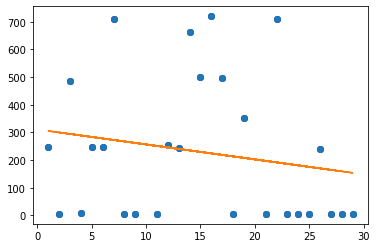

In [141]:
x = map_execution_times['Size percentage']
y = map_execution_times['Total app execution time (s)']
m, b = np.polyfit(x, y, 1)
print(m)

plt.plot(x, y, 'o ', color = 'blue')#, xlabel = 'Total file size percentage', ylabel = 'Total execution time (s)')
plt.plot(x, y, 'o', x, m*x+b, '-')

plt.show()

1.8882133021564071


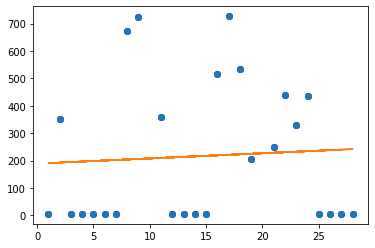

In [142]:
x = filter_execution_times['Size percentage']
y = filter_execution_times['Total app execution time (s)']
m, b = np.polyfit(x, y, 1)
print(m)

plt.plot(x, y, 'o ', color = 'blue')#, xlabel = 'Total file size percentage', ylabel = 'Total execution time (s)')
plt.plot(x, y, 'o', x, m*x+b, '-')

plt.show()

In [150]:
df_test = df.drop(columns = [column for column in df.columns if column.startswith('SHUFFLER') or column.startswith('SHUFFLEW')])
df_test = df_test.loc[df_test['Partition ID'] != '-']
df_test['Partition ID'] = df_test['Partition ID'].astype(int).apply(lambda x: x+1)
df_test_filter = df_test.loc[df_test['App Name'].apply(lambda x: x.split('_')[0]) == 'filter']
df_test_filter = df_test_filter.groupby('App ID').agg({'Partition ID': lambda x: max(x)}).reset_index(drop = False).\
            rename(columns = {'Partition ID': 'Partitions'})

In [151]:
pd.merge(filter_execution_times, df_test_filter)

,App ID,App Name,Total app execution time (s),Size percentage,Transformation,Partitions
0,app-20230704212702-3906,filter_app_narrow_transf_gsod_sample_019_1.txt,204.326,19,filter,58
1,app-20230704201013-3882,filter_app_narrow_transf_gsod_sample_006_1.txt,5.982,6,filter,19
2,app-20230704205425-3898,filter_app_narrow_transf_gsod_sample_015_1.txt,5.844,15,filter,46
3,app-20230704201426-3884,filter_app_narrow_transf_gsod_sample_007_1.txt,5.757,7,filter,22
4,app-20230704200142-3878,filter_app_narrow_transf_gsod_sample_004_1.txt,5.935,4,filter,13
5,app-20230704213546-3908,filter_app_narrow_transf_gsod_sample_021_1.txt,250.773,21,filter,64
6,app-20230704215559-3912,filter_app_narrow_transf_gsod_sample_023_1.txt,331.067,23,filter,70
7,app-20230704195317-3874,filter_app_narrow_transf_gsod_sample_002_1.txt,351.640,2,filter,6
8,app-20230704221920-3916,filter_app_narrow_transf_gsod_sample_025_1.txt,6.015,25,filter,76
9,app-20230704224346-3920,filter_app_narrow_transf_gsod_sample_027_1.txt,6.696,27,filter,82


In [153]:
df_test_map = df_test.loc[df_test['App Name'].apply(lambda x: x.split('_')[0]) == 'map']
df_test_map = df_test_map.groupby('App ID').agg({'Partition ID': lambda x: max(x)}).reset_index(drop = False).\
            rename(columns = {'Partition ID': 'Partitions'})

In [154]:
pd.merge(map_execution_times, df_test_map)

,App ID,App Name,Total app execution time (s),Size percentage,Transformation,Partitions
0,app-20230704200135-3877,map_app_narrow_transf_gsod_sample_004_1.txt,7.728,4,map,1
1,app-20230704223129-3917,map_app_narrow_transf_gsod_sample_026_1.txt,239.710,26,map,1
2,app-20230704202842-3889,map_app_narrow_transf_gsod_sample_011_1.txt,5.975,11,map,1
3,app-20230704194935-3871,map_app_narrow_transf_gsod_sample_001_1.txt,249.227,1,map,1
4,app-20230704201006-3881,map_app_narrow_transf_gsod_sample_006_1.txt,246.874,6,map,1
5,app-20230704200550-3879,map_app_narrow_transf_gsod_sample_005_1.txt,248.139,5,map,1
6,app-20230704204043-3893,map_app_narrow_transf_gsod_sample_013_1.txt,244.617,13,map,1
7,app-20230704195309-3873,map_app_narrow_transf_gsod_sample_002_1.txt,6.064,2,map,1
8,app-20230704203442-3891,map_app_narrow_transf_gsod_sample_012_1.txt,255.708,12,map,1
9,app-20230704201843-3885,map_app_narrow_transf_gsod_sample_008_1.txt,6.062,8,map,1
